In [144]:
import numpy as np
import matplotlib.pyplot as plt

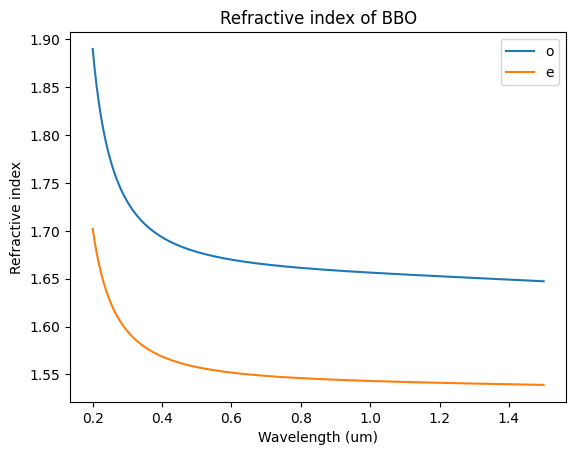

In [ ]:
def bbo_sellmeier_n(wavelength, axis='o'):
    """
    Sellmeier equation for BBO crystal
    https://refractiveindex.info
    Eimerl et al., 1987
    """
    if axis == 'o':
        A = 2.7405
        B = 0.0184
        C = 0.0179
        D = 0.0155
    elif axis == 'e':
        A = 2.3730
        B = 0.0128
        C = 0.0156
        D = 0.0044

    n2 = A + B / (wavelength**2 - C) - D * wavelength**2
    return np.sqrt(n2)

# plot the refractive index of BBO 
wavelength = np.linspace(0.2, 1.5, 1000)
n_o = bbo_sellmeier_n(wavelength, 'o')
n_e = bbo_sellmeier_n(wavelength, 'e')
plt.plot(wavelength, n_o)
plt.plot(wavelength, n_e)
plt.legend(['o', 'e'])
plt.xlabel('Wavelength (um)')
plt.ylabel('Refractive index')
plt.title('Refractive index of BBO')
plt.show()

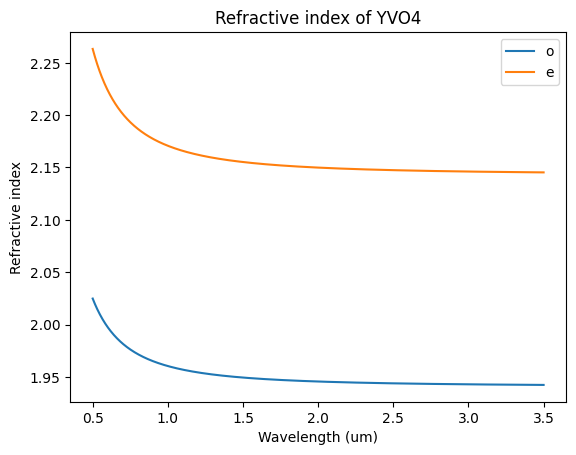

In [217]:
def yvo_sellmeier_n(wavelength, axis='o'):
    """
    Sellmeier equation for YVO4 crystal
    https://refractiveindex.info
    Birnbaum et al., 1976
    """
    if axis == 'o':
        A = 1
        B = 2.7665
        C = 0.026884
    elif axis == 'e':
        A = 1
        B = 3.5930
        C = 0.032103
    n2 = A + B * wavelength**2 / (wavelength**2 - C)
    return np.sqrt(n2)

# plot the refractive index of YVO4
wavelength = np.linspace(0.5, 3.5, 1000)
n_o = yvo_sellmeier_n(wavelength, 'o')
n_e = yvo_sellmeier_n(wavelength, 'e')
plt.plot(wavelength, n_o)
plt.plot(wavelength, n_e)
plt.legend(['o', 'e'])
plt.xlabel('Wavelength (um)')
plt.ylabel('Refractive index')
plt.title('Refractive index of YVO4')
plt.show()

In [146]:
def get_phase(n, thickness, wavelength):
    return 2 * np.pi * n * thickness / wavelength

def bbo_sellmeier_n_eff(wavelength, theta=np.pi/4):
    """
    Effective refractive index of BBO
    """
    no = bbo_sellmeier_n(wavelength, 'o')
    ne = bbo_sellmeier_n(wavelength, 'e')
    n = np.sqrt(no**2 * np.sin(theta)**2 + ne**2 * np.cos(theta)**2)
    return n

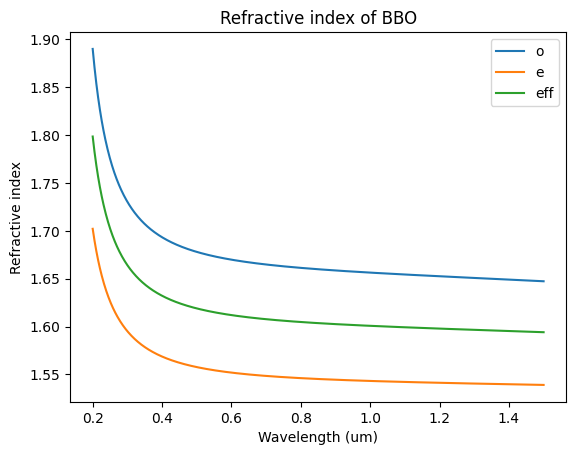

In [153]:
# plot the refractive index of BBO 
wavelength = np.linspace(0.2, 1.5, 1000)
n_o = bbo_sellmeier_n(wavelength, 'o')
n_e = bbo_sellmeier_n(wavelength, 'e')
n_eff = bbo_sellmeier_n_eff(wavelength)
plt.plot(wavelength, n_o)
plt.plot(wavelength, n_e)
plt.plot(wavelength, n_eff)
plt.legend(['o', 'e', 'eff'])
plt.xlabel('Wavelength (um)')
plt.ylabel('Refractive index')
plt.title('Refractive index of BBO')
plt.show()

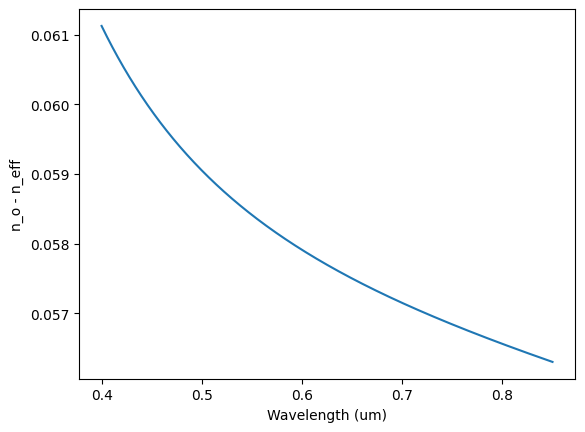

In [171]:
wavelength = np.linspace(0.4, 0.85, 1000)
n_o = bbo_sellmeier_n(wavelength, 'o')
n_e = bbo_sellmeier_n(wavelength, 'e')
n_eff = bbo_sellmeier_n_eff(wavelength)

plt.plot(wavelength, n_o - n_eff)

plt.xlabel("Wavelength (um)")
plt.ylabel("n_o - n_eff", )
plt.show()

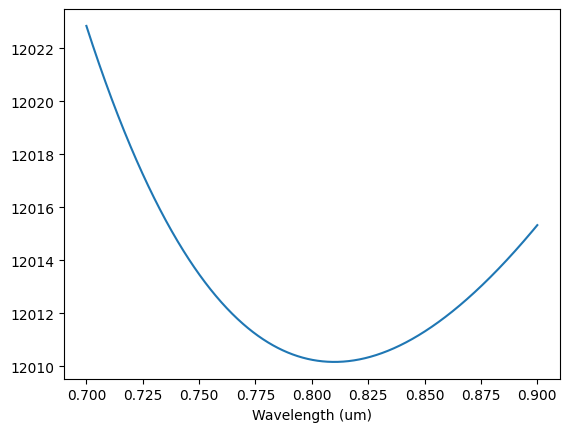

In [196]:
wavelength = np.linspace(0.7, 0.9, 1000)
n_o = bbo_sellmeier_n(wavelength, "o")
n_eff = bbo_sellmeier_n_eff(wavelength)

phase_1 = (n_o - n_eff) / wavelength

pump_wavelength = 0.405  # um
s_wavelength = 1 / (1 / pump_wavelength - 1 / wavelength)

n_o = bbo_sellmeier_n(s_wavelength, "o")
n_eff = bbo_sellmeier_n_eff(s_wavelength)
phase_2 = (n_o - n_eff) / s_wavelength

# plt.plot(wavelength, phase_1)
# plt.plot(wavelength, phase_2)

total_phase = (phase_1 + phase_2) * 2 * np.pi * 13.7e3 

plt.plot(wavelength, total_phase)
plt.xlabel("Wavelength (um)")
plt.show()

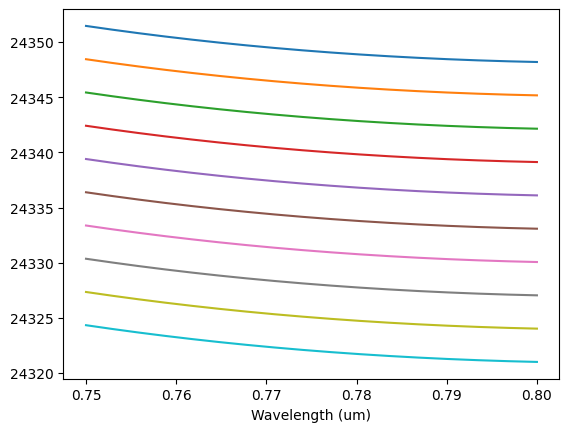

In [261]:
for pump_wavelength in np.linspace(0.4052, 0.4056, 10):
    wavelength = np.linspace(0.75, 0.8, 1000)
    n_o_1 = bbo_sellmeier_n(wavelength, "o")
    n_eff_1 = bbo_sellmeier_n_eff(wavelength)

    phase_1 = 2 * np.pi * (n_o_1 - n_eff_1) / wavelength

    s_wavelength = 1 / (1 / pump_wavelength - 1 / wavelength)

    n_o_2 = bbo_sellmeier_n(s_wavelength, "o")
    n_eff_2 = bbo_sellmeier_n_eff(s_wavelength)
    phase_2 = 2 * np.pi * (n_o_2 - n_eff_2) / s_wavelength

    # plt.plot(wavelength, phase_1)
    # plt.plot(wavelength, phase_2)

    n_o_p = bbo_sellmeier_n(pump_wavelength, "o")
    n_eff_p = bbo_sellmeier_n_eff(pump_wavelength)
    pump_phase = 2 * np.pi * (n_o_p - n_eff_p) / pump_wavelength

    total_phase = (phase_1 + phase_2) * 13.76e3 + pump_phase * 13e3

    plt.plot(wavelength, total_phase)
    plt.xlabel("Wavelength (um)")
plt.show()

# Adding Compensation

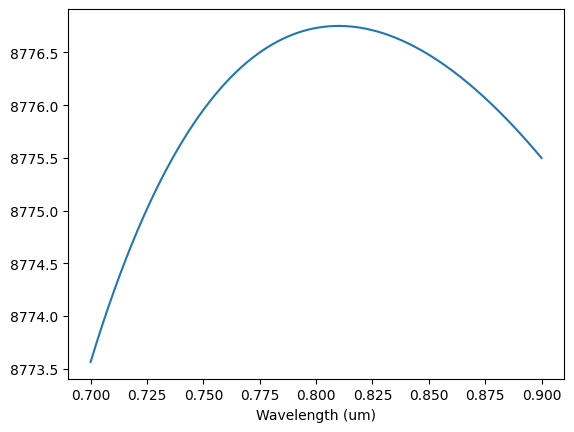

In [262]:
wavelength = np.linspace(0.7, 0.9, 1000)
n_o_1 = bbo_sellmeier_n(wavelength, "o")
n_eff_1 = bbo_sellmeier_n_eff(wavelength)
phase_1 = 2 * np.pi * (n_o_1 - n_eff_1) / wavelength * 13.7e3

pump_wavelength = 0.405  # um
s_wavelength = 1 / (1 / pump_wavelength - 1 / wavelength)

n_o_2 = bbo_sellmeier_n(s_wavelength, "o")
n_eff_2 = bbo_sellmeier_n_eff(s_wavelength)
phase_2 = 2 * np.pi * (n_o_2 - n_eff_2) / s_wavelength * 13.7e3


n_o_yvo_i = yvo_sellmeier_n(wavelength, "o")
n_e_yvo_i = yvo_sellmeier_n(wavelength, "e")

n_o_yvo_s = yvo_sellmeier_n(s_wavelength, "o")
n_e_yvo_s = yvo_sellmeier_n(s_wavelength, "e")

post_compensation_phase = (
    2
    * np.pi
    * (
        n_o_yvo_i / wavelength
        + n_o_yvo_s / s_wavelength
        - n_e_yvo_i / wavelength
        - n_e_yvo_s / s_wavelength
    )
) * 0.97e3

total_phase = (phase_1 + phase_2 + post_compensation_phase)


plt.plot(wavelength, total_phase)
plt.xlabel("Wavelength (um)")
plt.show()


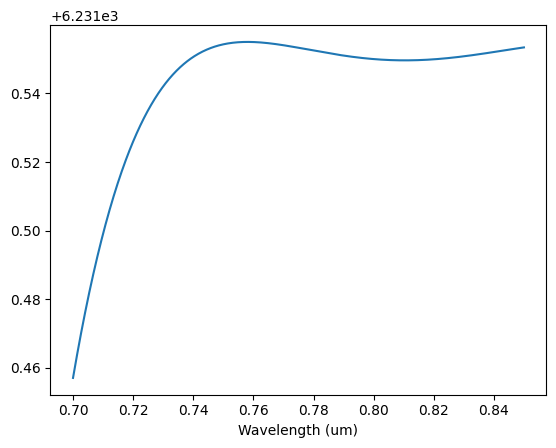

In [299]:
for pump_wavelength in np.linspace(0.4052, 0.4058, 1):
    wavelength = np.linspace(0.7, 0.85, 1000)
    n_o_1 = bbo_sellmeier_n(wavelength, "o")
    n_eff_1 = bbo_sellmeier_n_eff(wavelength)
    phase_1 = 2 * np.pi * (n_o_1 - n_eff_1) / wavelength * 13.7e3

    s_wavelength = 1 / (1 / pump_wavelength - 1 / wavelength)

    n_o_2 = bbo_sellmeier_n(s_wavelength, "o")
    n_eff_2 = bbo_sellmeier_n_eff(s_wavelength)
    phase_2 = 2 * np.pi * (n_o_2 - n_eff_2) / s_wavelength * 13.7e3

    n_o_yvo_i = yvo_sellmeier_n(wavelength, "o")
    n_e_yvo_i = yvo_sellmeier_n(wavelength, "e")

    n_o_yvo_s = yvo_sellmeier_n(s_wavelength, "o")
    n_e_yvo_s = yvo_sellmeier_n(s_wavelength, "e")

    n_o_yvo_p = yvo_sellmeier_n(pump_wavelength, "o")
    n_e_yvo_p = yvo_sellmeier_n(pump_wavelength, "e")

    pre_compensation_phase = (
        2 * np.pi * (n_o_yvo_p - n_e_yvo_p) / pump_wavelength
    ) * 0.780e3 # 0.78e3

    post_compensation_phase = (
        2
        * np.pi
        * (
            n_o_yvo_i / wavelength
            + n_o_yvo_s / s_wavelength
            - n_e_yvo_i / wavelength
            - n_e_yvo_s / s_wavelength
        )
    ) * 0.78e3 # 0.97e3

    total_phase = (phase_1 + phase_2 + pre_compensation_phase + post_compensation_phase)


    plt.plot(wavelength, total_phase)
    plt.xlabel("Wavelength (um)")
plt.show()
